In [1]:
import numpy as np


#加载数据
def load_data():
    with open('简单分类数据.txt') as fr:
        lines = fr.readlines()

    x = np.empty((len(lines), 2), dtype=float)
    y = np.empty(len(lines), dtype=int)

    for i in range(len(lines)):
        line = lines[i].strip().split('\t')
        x[i] = line[:2]
        y[i] = line[2]

    #以y区分两类x
    x0 = x[y == -1]
    x1 = x[y == 1]

    return x0, x1


x0, x1 = load_data()

x0[:5], x1[:5]

(array([[-0.017612, 14.053064],
        [-0.752157,  6.53862 ],
        [-1.322371,  7.152853],
        [ 0.423363, 11.054677],
        [ 0.667394, 12.741452]]),
 array([[-1.395634,  4.662541],
        [ 0.406704,  7.067335],
        [-2.46015 ,  6.866805],
        [ 0.850433,  6.920334],
        [ 1.176813,  3.16702 ]]))

In [2]:
#求向量均值
mu0 = x0.mean(axis=0)
mu1 = x1.mean(axis=0)

mu0, mu1

(array([ 0.08204613, 10.65488423]), array([-0.01613109,  2.95908379]))

In [3]:
#求协方差矩阵
def get_cov(x):
    c = x.shape[1]
    cov = np.zeros([c, c])

    for i in range(c):
        xi = x[:, i]

        for j in range(c):
            xj = x[:, j]

            #协方差 = (x1 - x1.mean()) * (x2 - x2.mean()) / (n - 1)
            xi = xi - xi.mean()
            xj = xj - xj.mean()

            var = xi * xj

            n = len(var)

            var = var.sum()
            var /= (n - 1)

            cov[i, j] = var

    return cov


#等价
get_cov(x0), np.cov(x0, rowvar=False)

(array([[0.9579532 , 0.54249108],
        [0.54249108, 3.70851954]]),
 array([[0.9579532 , 0.54249108],
        [0.54249108, 3.70851954]]))

In [4]:
#协方差矩阵
sigma0 = np.cov(x0, rowvar=False)
sigma1 = np.cov(x1, rowvar=False)

sigma0, sigma1

(array([[0.9579532 , 0.54249108],
        [0.54249108, 3.70851954]]),
 array([[1.75563826, 2.04944407],
        [2.04944407, 9.42458334]]))

In [5]:
#初始化w
w = np.ones(2)
w

array([1., 1.])

In [55]:
#投影后的均值 = 均值的投影
w.dot(x0.T).mean(), w.dot(mu0)

(10.736930361702129, 10.736930361702129)

In [58]:
#投影后的方差可以使用投影前的协方差矩阵计算出来
p0 = w.dot(x0.T)

w.dot(sigma0).dot(w), ((p0 - p0.mean())**2).sum() / (len(p0) - 1)

(5.751454888467757, 5.751454888467757)

In [59]:
#这个就是loss函数
def get_J():
    #投影后,两类的中心点距离最远
    fenzi = np.power(w.dot(mu0) - w.dot(mu1), 2)
    #投影后,两类的方差最小
    fenmu = w.dot(sigma0).dot(w) + w.dot(sigma1).dot(w)

    return fenzi / fenmu


get_J()

2.888466806593992

In [7]:
#暴力求梯度法
def gradient():
    global w
    upsilon = 1e-2

    l1 = get_J()
    w[0] += upsilon
    l2 = get_J()
    w[0] -= upsilon
    gradient_w0 = (l2 - l1) / upsilon

    l1 = get_J()
    w[1] += upsilon
    l2 = get_J()
    w[1] -= upsilon
    gradient_w1 = (l2 - l1) / upsilon

    return np.array([gradient_w0, gradient_w1])


gradient()

array([-1.38135267,  1.37410665])

In [8]:
#训练
for i in range(50):
    w += gradient() * 1

    if i % 10 == 0:
        print(get_J(), w)

4.768051340025158 [-0.38135267  2.37410665]
5.4261552382036315 [-1.72587658  1.90296174]
5.426155141029574 [-1.72756646  1.90479546]
5.426155157822327 [-1.72923578  1.90664113]
5.426155174541138 [-1.73090184  1.9084832 ]


In [9]:
#投影
p0 = x0.dot(w)
p1 = x1.dot(w)

p0[:5], p1[:5]

(array([26.8738025 , 13.79270217, 15.95380985, 20.38252513, 23.1817392 ]),
 array([11.32389099, 12.7950117 , 17.37850534, 11.74550404,  4.01073614]))

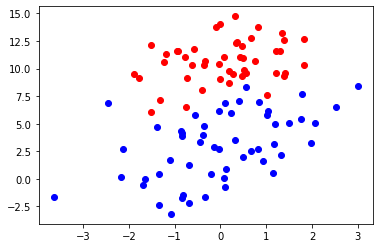

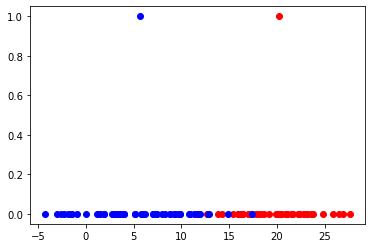

In [10]:
import matplotlib.pyplot as plt


def draw():
    plt.scatter(x0[:, 0], x0[:, 1], c='red')
    plt.scatter(x1[:, 0], x1[:, 1], c='blue')

    plt.show()

    plt.scatter(p0, np.zeros(len(p0)), c='red')
    plt.scatter(p1, np.zeros(len(p1)), c='blue')

    plt.scatter(p0.mean(), 1, c='red')
    plt.scatter(p1.mean(), 1, c='blue')

    plt.show()


draw()

In [11]:
#预测函数
def predict(p):
    d0 = np.power(p - p0.mean(), 2)
    d1 = np.power(p - p1.mean(), 2)
    pred = 1 if d0 > d1 else -1
    return pred


predict(p0[0])

-1

In [12]:
#测试
correct = 0
for i in p0:
    if predict(i) == -1:
        correct += 1

for i in p1:
    if predict(i) == 1:
        correct += 1

correct / (len(p0) + len(p1))

0.97